# Temp

In [1]:
import random, numpy as np, pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os

In [2]:
%run ../../stochastic_fractal_m.py

In [3]:
alphap = 2
probp = 0.75

In [29]:
ensemble_size = 500*1
time_iteration = 1000*100
min_iteration = 1000*10

# number_of_points = 21

iteration_step = 5000

## Directories

In [30]:
dir_data = "../../data/alpha{}/".format(alphap)
dir_fig  ="../../figures/alpha{}/".format(alphap)


## While testing
dir_data = "../../data/temp/alpha{}/".format(alphap)
dir_fig  ="../../figures/temp/alpha{}/".format(alphap)

# create directory if it does not exists
for dir_name in [dir_data, dir_fig]:
    if not os.path.isdir(dir_name):
        os.mkdir(dir_name)
        print("directory ", dir_name, " is created")
    else:
        print("directory ", dir_name, " exists")
    pass

### Filename
filename = "fractal_dim_alpha_{}_p_{}".format(alphap, int(probp*100))
out_data_filename = dir_data +filename
print(out_data_filename)

directory  ../../data/temp/alpha2/  exists
directory  ../../figures/temp/alpha2/  exists
../../data/temp/alpha2/fractal_dim_alpha_2_p_75


In [31]:
sf_numberlength = NumberLength(alpha=alphap, probability=probp)
sf_numberlength.log(True)

kwargs  {'alpha': 2, 'probability': 0.75}


In [32]:
sf_numberlength.run(time_iteration, min_iteration, iteration_step)

array([[17.        ,  0.46644586],
       [19.        ,  0.46644586],
       [21.        ,  0.46644586],
       [24.        ,  0.46644586],
       [25.        ,  0.46644586],
       [26.        ,  0.46644586],
       [26.        ,  0.46644586],
       [26.        ,  0.46644586],
       [27.        ,  0.46644586],
       [27.        ,  0.46644586],
       [29.        ,  0.46644586],
       [30.        ,  0.46644586],
       [32.        ,  0.46644586],
       [32.        ,  0.46644586],
       [32.        ,  0.45748169],
       [32.        ,  0.45748169],
       [33.        ,  0.45748169],
       [33.        ,  0.45748169],
       [34.        ,  0.44799201]])

In [33]:
data = sf_numberlength.run_ensemble(ensemble_size, time_iteration, min_iteration, iteration_step)

realization  5  . Time spent  0.650658369064331  sec
realization  10  . Time spent  0.6533751487731934  sec
realization  15  . Time spent  0.6950154304504395  sec
realization  20  . Time spent  0.7782754898071289  sec
realization  25  . Time spent  0.6924326419830322  sec
realization  30  . Time spent  0.7463524341583252  sec
realization  35  . Time spent  0.7014780044555664  sec
realization  40  . Time spent  0.613008975982666  sec
realization  45  . Time spent  0.6966936588287354  sec
realization  50  . Time spent  1.0340285301208496  sec
realization  55  . Time spent  0.6355834007263184  sec
realization  60  . Time spent  0.7088444232940674  sec
realization  65  . Time spent  0.7526257038116455  sec
realization  70  . Time spent  0.7323768138885498  sec
realization  75  . Time spent  0.620657205581665  sec
realization  80  . Time spent  0.7608067989349365  sec
realization  85  . Time spent  0.9017274379730225  sec
realization  90  . Time spent  0.7927360534667969  sec
realization  9

estimated df(alpha, p)=  0.7797954654495325


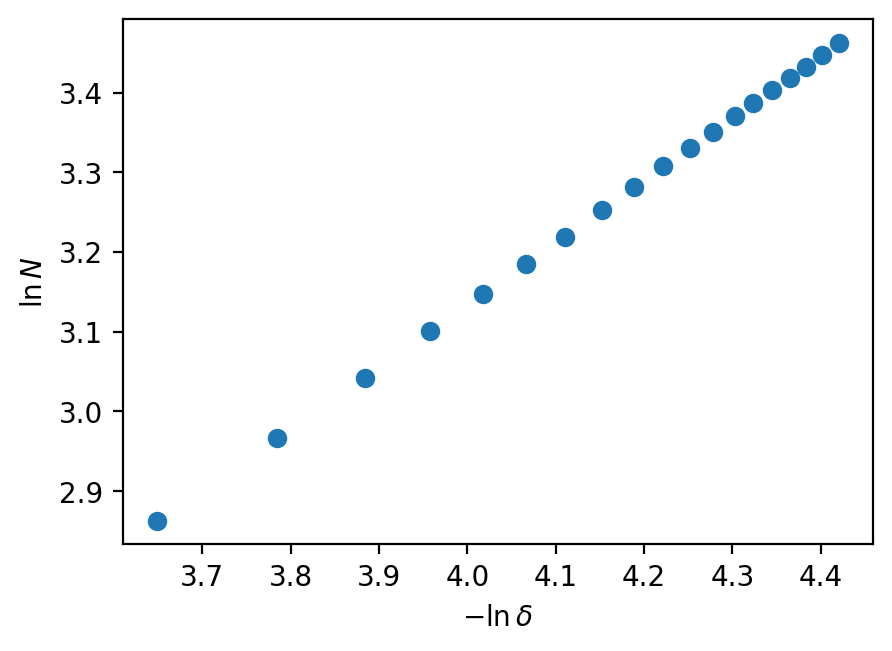

In [34]:
fig, axes = plt.subplots(1,1,figsize = (5,3.5),dpi = 200)
N1_average, M1_average = data.T
N1_log = np.log(N1_average)
minus_delta1_log = N1_log - np.log(M1_average)
slope, intercept = np.polyfit(minus_delta1_log, N1_log, 1)
print("estimated df(alpha, p)= ", slope)
plt.plot(minus_delta1_log, N1_log, "o")
plt.xlabel(r"$-\ln\,\delta$")
plt.ylabel(r"$\ln\,N$")
axes.set_position([0.15,0.15,0.75,0.75])

In [35]:
print("estimated   df = ", slope)
ana_soln = AnalyticSoln()
print("Theoritical df =", ana_soln.find_df(alphap, probp))

estimated   df =  0.7797954654495325
Theoritical df = 0.778719


In [36]:
N1_average.shape

(19,)

In [37]:
N1_average

array([17.512, 19.414, 20.942, 22.206, 23.264, 24.158, 24.994, 25.844,
       26.626, 27.32 , 27.94 , 28.51 , 29.112, 29.574, 30.076, 30.524,
       30.958, 31.406, 31.874])

In [38]:
M1_average

array([0.45576944, 0.440871  , 0.43079394, 0.42412104, 0.41854756,
       0.4141443 , 0.40981481, 0.40647562, 0.40374624, 0.40097806,
       0.39771461, 0.39556936, 0.39400903, 0.39188648, 0.39020118,
       0.38822873, 0.38638636, 0.38495512, 0.38354497])

### Write data to file

In [39]:
header = dict()
header['alpha'] = alphap
header['probability'] = probp
header['ensemble_size']=ensemble_size
header['total_time_iteraion']=time_iteration
header['min_time_iteraion']=min_iteration
header['cols'] = ["t", "N", "M"]

time_col = np.arange(min_iteration, time_iteration+1, iteration_step)

header_str = json.dumps(header)
print(header_str)
print(out_data_filename)
# np.savetxt(out_data_filename, np.c_[time_col, N1_average, M1_average], header=header_str)

{"alpha": 2, "probability": 0.75, "ensemble_size": 500, "total_time_iteraion": 100000, "min_time_iteraion": 10000, "cols": ["t", "N", "M"]}
../../data/temp/alpha2/fractal_dim_alpha_2_p_75


### plot $-\ln \delta$ vs $\ln t$

In [40]:
def convert_to_plot(N1_average, M1_average):
    N1_log = np.log(N1_average)
    minus_delta1_log = N1_log - np.log(M1_average)
    slope, intercept = np.polyfit(minus_delta1_log, N1_log, 1)
    return minus_delta1_log, N1_log, slope, intercept

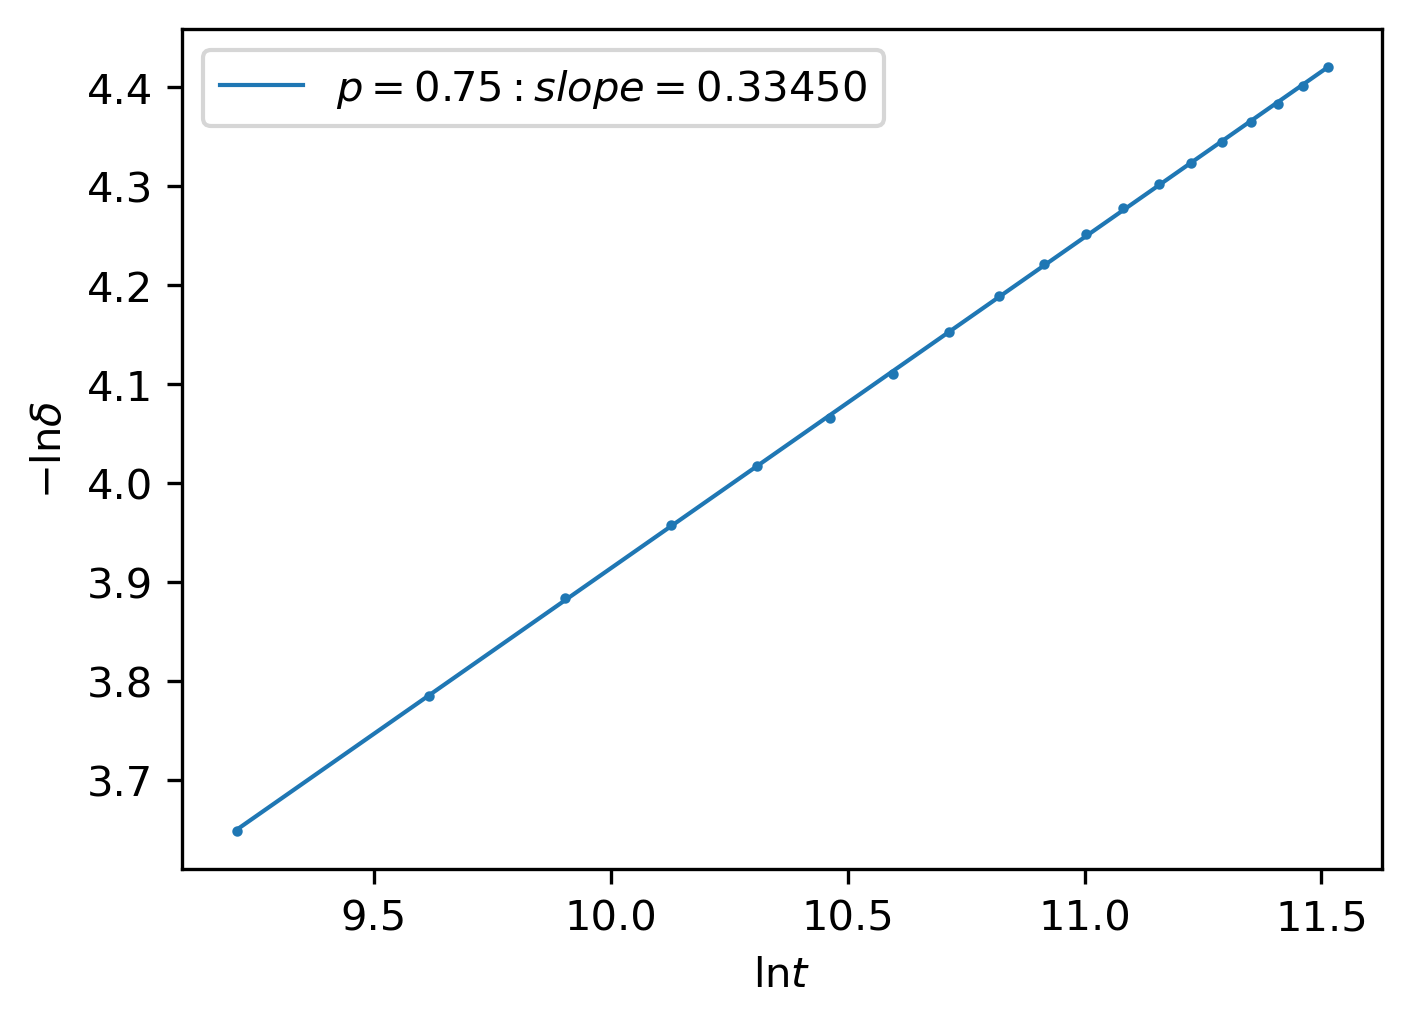

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5), dpi=300)
colors = ['tab:blue', 'tab:orange', 'tab:green']

i = 0

tt = np.arange(min_iteration, time_iteration+1, iteration_step)

t, N, M =tt, N1_average, M1_average
y, yyy, slope, intercept = convert_to_plot(N, M)
log_t = np.log(t)

regress = stats.linregress(log_t, y)
plt.plot(log_t, y, 'o', color=colors[i], markersize=1.5)
yyyyy = log_t*regress[0] + regress[1]
plt.plot(log_t, yyyyy, label=r"$p={:.2f}: slope={:.5f}$".format(probp, regress[0]),  color=colors[i], linewidth=1)
i += 1

# plt.legend(loc='best', bbox_to_anchor=(0.5, 0.05, 0.5, 0.5))
plt.legend(loc=2)
plt.ylabel(r"$-\ln \delta$")
plt.xlabel(r"$\ln t$")
# plt.ylim([0.5, 3])
ax.set_position([0.15, 0.15, 0.8, 0.8])
# print(fig_filename)
# plt.savefig(fig_filename

In [17]:
tt.shape

(19,)

In [18]:
np.arange(1000, 10000+5_00, 5_00)

array([ 1000,  1500,  2000,  2500,  3000,  3500,  4000,  4500,  5000,
        5500,  6000,  6500,  7000,  7500,  8000,  8500,  9000,  9500,
       10000])

In [19]:
np.linspace(1000, 10000, 19)

array([ 1000.,  1500.,  2000.,  2500.,  3000.,  3500.,  4000.,  4500.,
        5000.,  5500.,  6000.,  6500.,  7000.,  7500.,  8000.,  8500.,
        9000.,  9500., 10000.])

In [20]:
min_iteration = 1000
time_iteration = 10000
iteration_step = 500

In [21]:
list(range(min_iteration, time_iteration + 1, iteration_step))

[1000,
 1500,
 2000,
 2500,
 3000,
 3500,
 4000,
 4500,
 5000,
 5500,
 6000,
 6500,
 7000,
 7500,
 8000,
 8500,
 9000,
 9500,
 10000]

In [22]:
np.arange(min_iteration, time_iteration+1, iteration_step)

array([ 1000,  1500,  2000,  2500,  3000,  3500,  4000,  4500,  5000,
        5500,  6000,  6500,  7000,  7500,  8000,  8500,  9000,  9500,
       10000])

In [23]:
np.linspace(min_iteration, time_iteration, 19)

array([ 1000.,  1500.,  2000.,  2500.,  3000.,  3500.,  4000.,  4500.,
        5000.,  5500.,  6000.,  6500.,  7000.,  7500.,  8000.,  8500.,
        9000.,  9500., 10000.])

In [24]:
time_iteration = 100
min_iteration = 10


number_of_points = 11
iteration_step = 9

In [25]:
ll = list(range(min_iteration, time_iteration + 1, iteration_step))
print(ll)
print(len(ll))

[10, 19, 28, 37, 46, 55, 64, 73, 82, 91, 100]
11


In [26]:
a = time_iteration-min_iteration
print(a)

90


In [27]:
(time_iteration-min_iteration) / iteration_step + 1

11.0

In [28]:
step_size = (time_iteration - min_iteration)/(number_of_points-1)
print(step_size)

9.0
